# Next Steps Project
This notebook provides a more advanced and less structured exercise for students who have completed the NVIDIA DLI workshop *[Fundamentals of Deep Learning](https://www.nvidia.com/content/dam/en-zz/Solutions/deep-learning/deep-learning-education/dli-fundamentals-of-deep-learning-1369828-r3-web.pdf)* and wish to practice more before working on their own applications.

The container this Jupyter Lab environment is running in was also used in the workshop, so, you can use all the same libraries and techniques from the workshop while working on this exercise.

## Project: Visualize a Neural Network
In the Lecture 3, this is a slide that visualizes a neural network:

![lecture_3_network](03_ASL/images/kernels_and_neural_networks.png)

To make this slide, we used the same neural network that was built in notebook 03_asl_cnn.ipynb, and extracted the weights from the layers. We would like to encourage you to do the same thing. Not only is this a great debugging tool with Keras, but it can also make some pretty cool images!
**The open-ended goal of this *Next Steps* project is to learn how to visualize Keras layers.**

### Load the Data
To get started, Keras has mnist built right in it. Use the command below to load it.

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

num_categories = 10
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

### Build a Model
Next, we'll build a simple model to help get started. Try modifying the model into increasingly complex models to see how this changes the images.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(1, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(units=num_categories, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 15s 6ms/step - loss: 0.4775 - accuracy: 0.8597 - val_loss: 0.2805 - val_accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2895 - accuracy: 0.9173 - val_loss: 0.2560 - val_accuracy: 0.9236
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2653 - accuracy: 0.9250 - val_loss: 0.2552 - val_accuracy: 0.9265
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2516 - accuracy: 0.9284 - val_loss: 0.2499 - val_accuracy: 0.9272
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2415 - accuracy: 0.9323 - val_loss: 0.2273 - val_accuracy: 0.9342


### Get the Weights

After a model trains, we can get the weights of a layer with the [get_weights](https://keras.io/api/layers/base_layer/#get_weights-method) method. Below shows a sample of how to plot the kernel trained in the Conv2D layer above. Can you figure out how to see the Dense layer? Or can you add another Conv2D layer and plot all the kernels?

There are many types of model architectures. Play around and see if you can find a relationship between what the model learns and the data that is fed into it. Good luck and have fun!

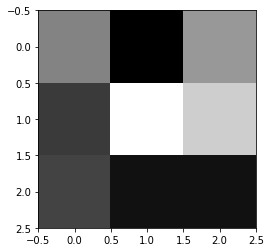

In [9]:
import matplotlib.pyplot as plt

# Grab weights from 0th layer.
layer_weights = model.get_weights()[0]
# layer weights are represented by 4 dimensions. Can you figure out what each dimension represents?

kernel_weights = layer_weights[:,:,0,:]
# Uncomment to see raw
#print(layer_weights)
#print(kernel_weights)
plt.imshow(kernel_weights,cmap='gray')

## Additional Resources

Can't wait to learn more? Check out these additional resources:

* [Practical Deep Learning for Cloud, Mobile, and Edge](https://www.oreilly.com/library/view/practical-deep-learning/9781492034858/) - O'Reilly Book
* [A Survey of Knowledge-Enhanced Text Generation](https://paperswithcode.com/paper/a-survey-of-knowledge-enhanced-text) - An exploration of how to include more context in text generation
* [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d) - A visual look into popular CNN Architectures
* [Convolutional Neural Network (CNN)](https://developer.nvidia.com/discover/convolutional-neural-network) - An overview of CNNs